In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('../Datasets/wine-clustering.csv')
df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


## Check Scale of Data

In [4]:
df.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

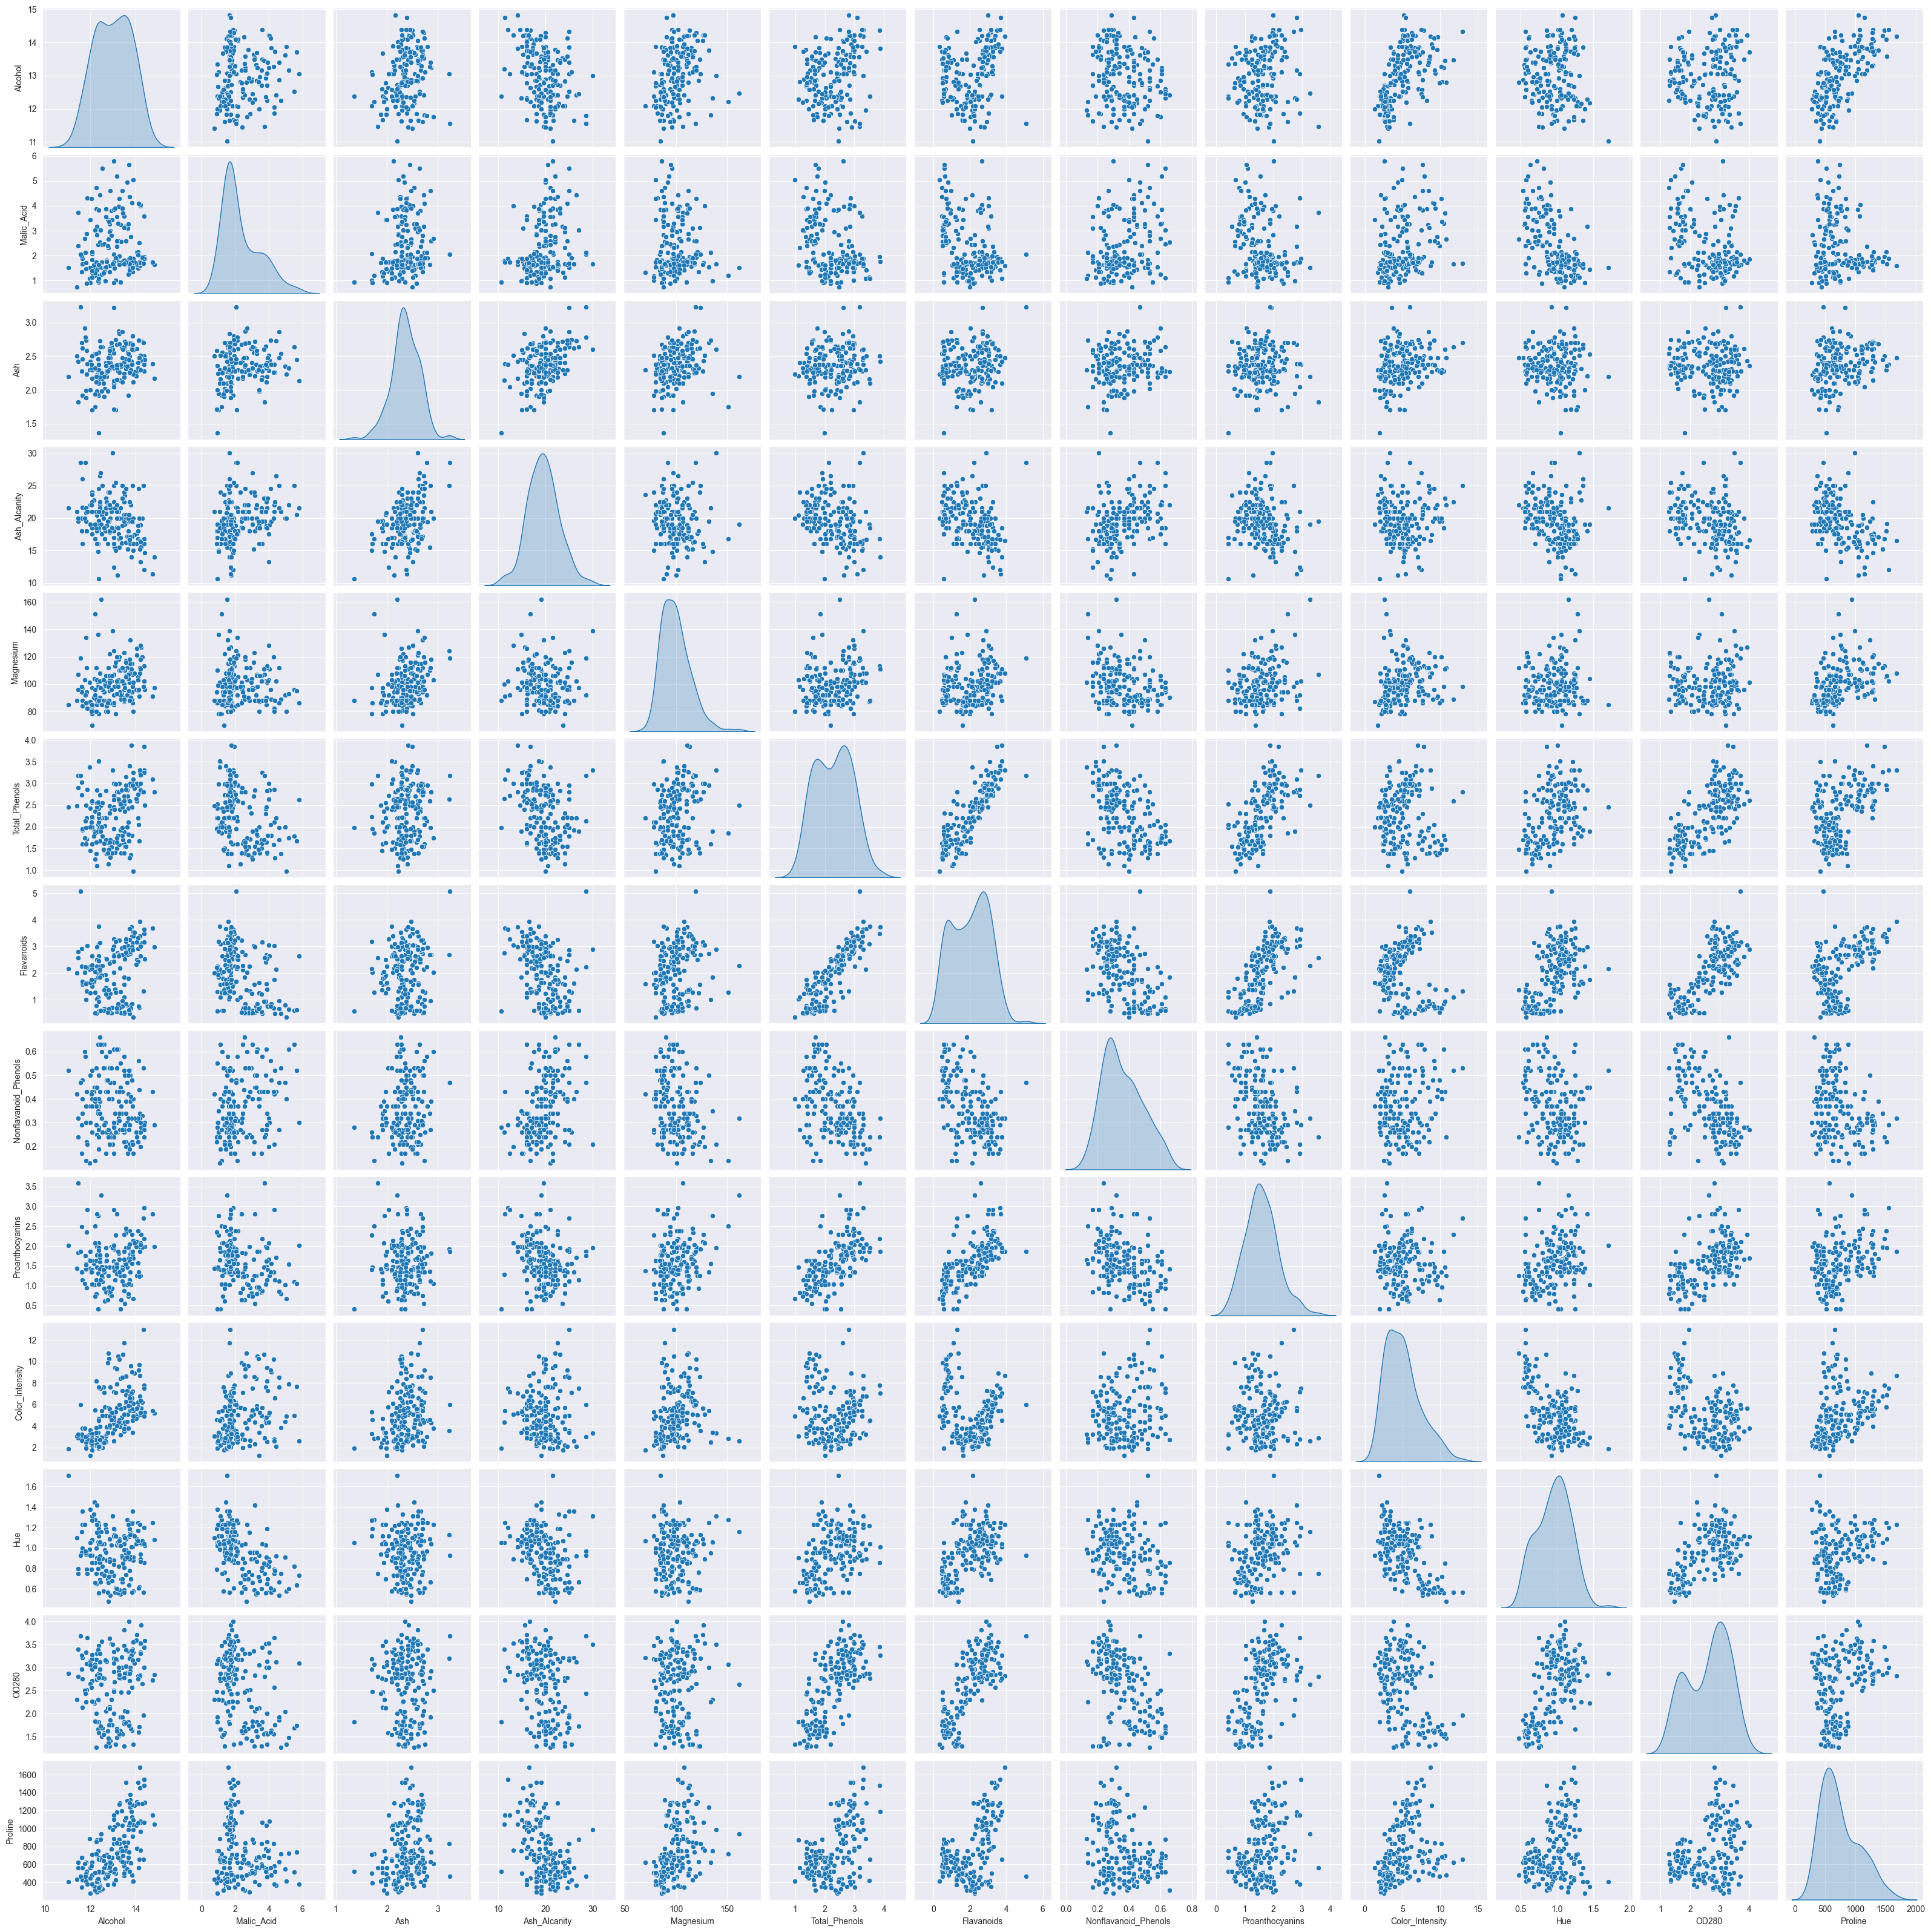

In [5]:
sns.pairplot(df, diag_kind='kde')
plt.show()

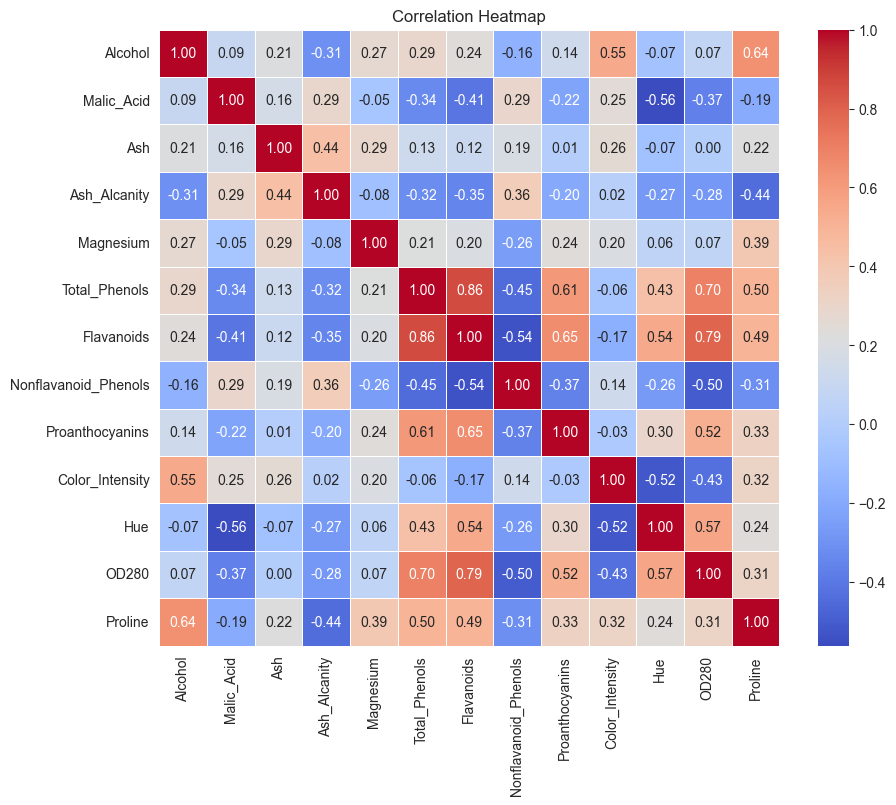

In [6]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [7]:
scaler = StandardScaler()
features = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols','Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

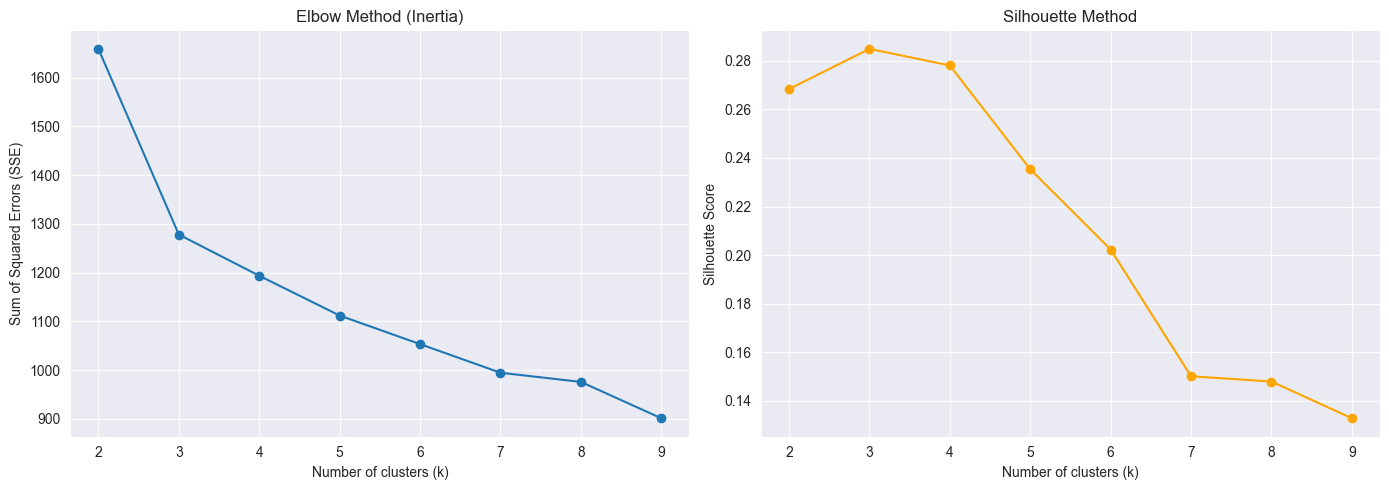

In [8]:
sse = []
silhouette_scores = []
k_range = range(2, 10)  

for k in k_range:
    km = KMeans(n_clusters=k, n_init='auto')
    labels = km.fit_predict(df_scaled)
    sse.append(km.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, labels))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(k_range, sse, marker='o')
axes[0].set_title('Elbow Method (Inertia)')
axes[0].set_xlabel('Number of clusters (k)')
axes[0].set_ylabel('Sum of Squared Errors (SSE)')
axes[0].grid(True)

axes[1].plot(k_range, silhouette_scores, marker='o', color='orange')
axes[1].set_title('Silhouette Method')
axes[1].set_xlabel('Number of clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [9]:
km = KMeans(n_clusters=3, n_init='auto')
km.fit(df_scaled)
df['Cluster'] = km.predict(df_scaled)

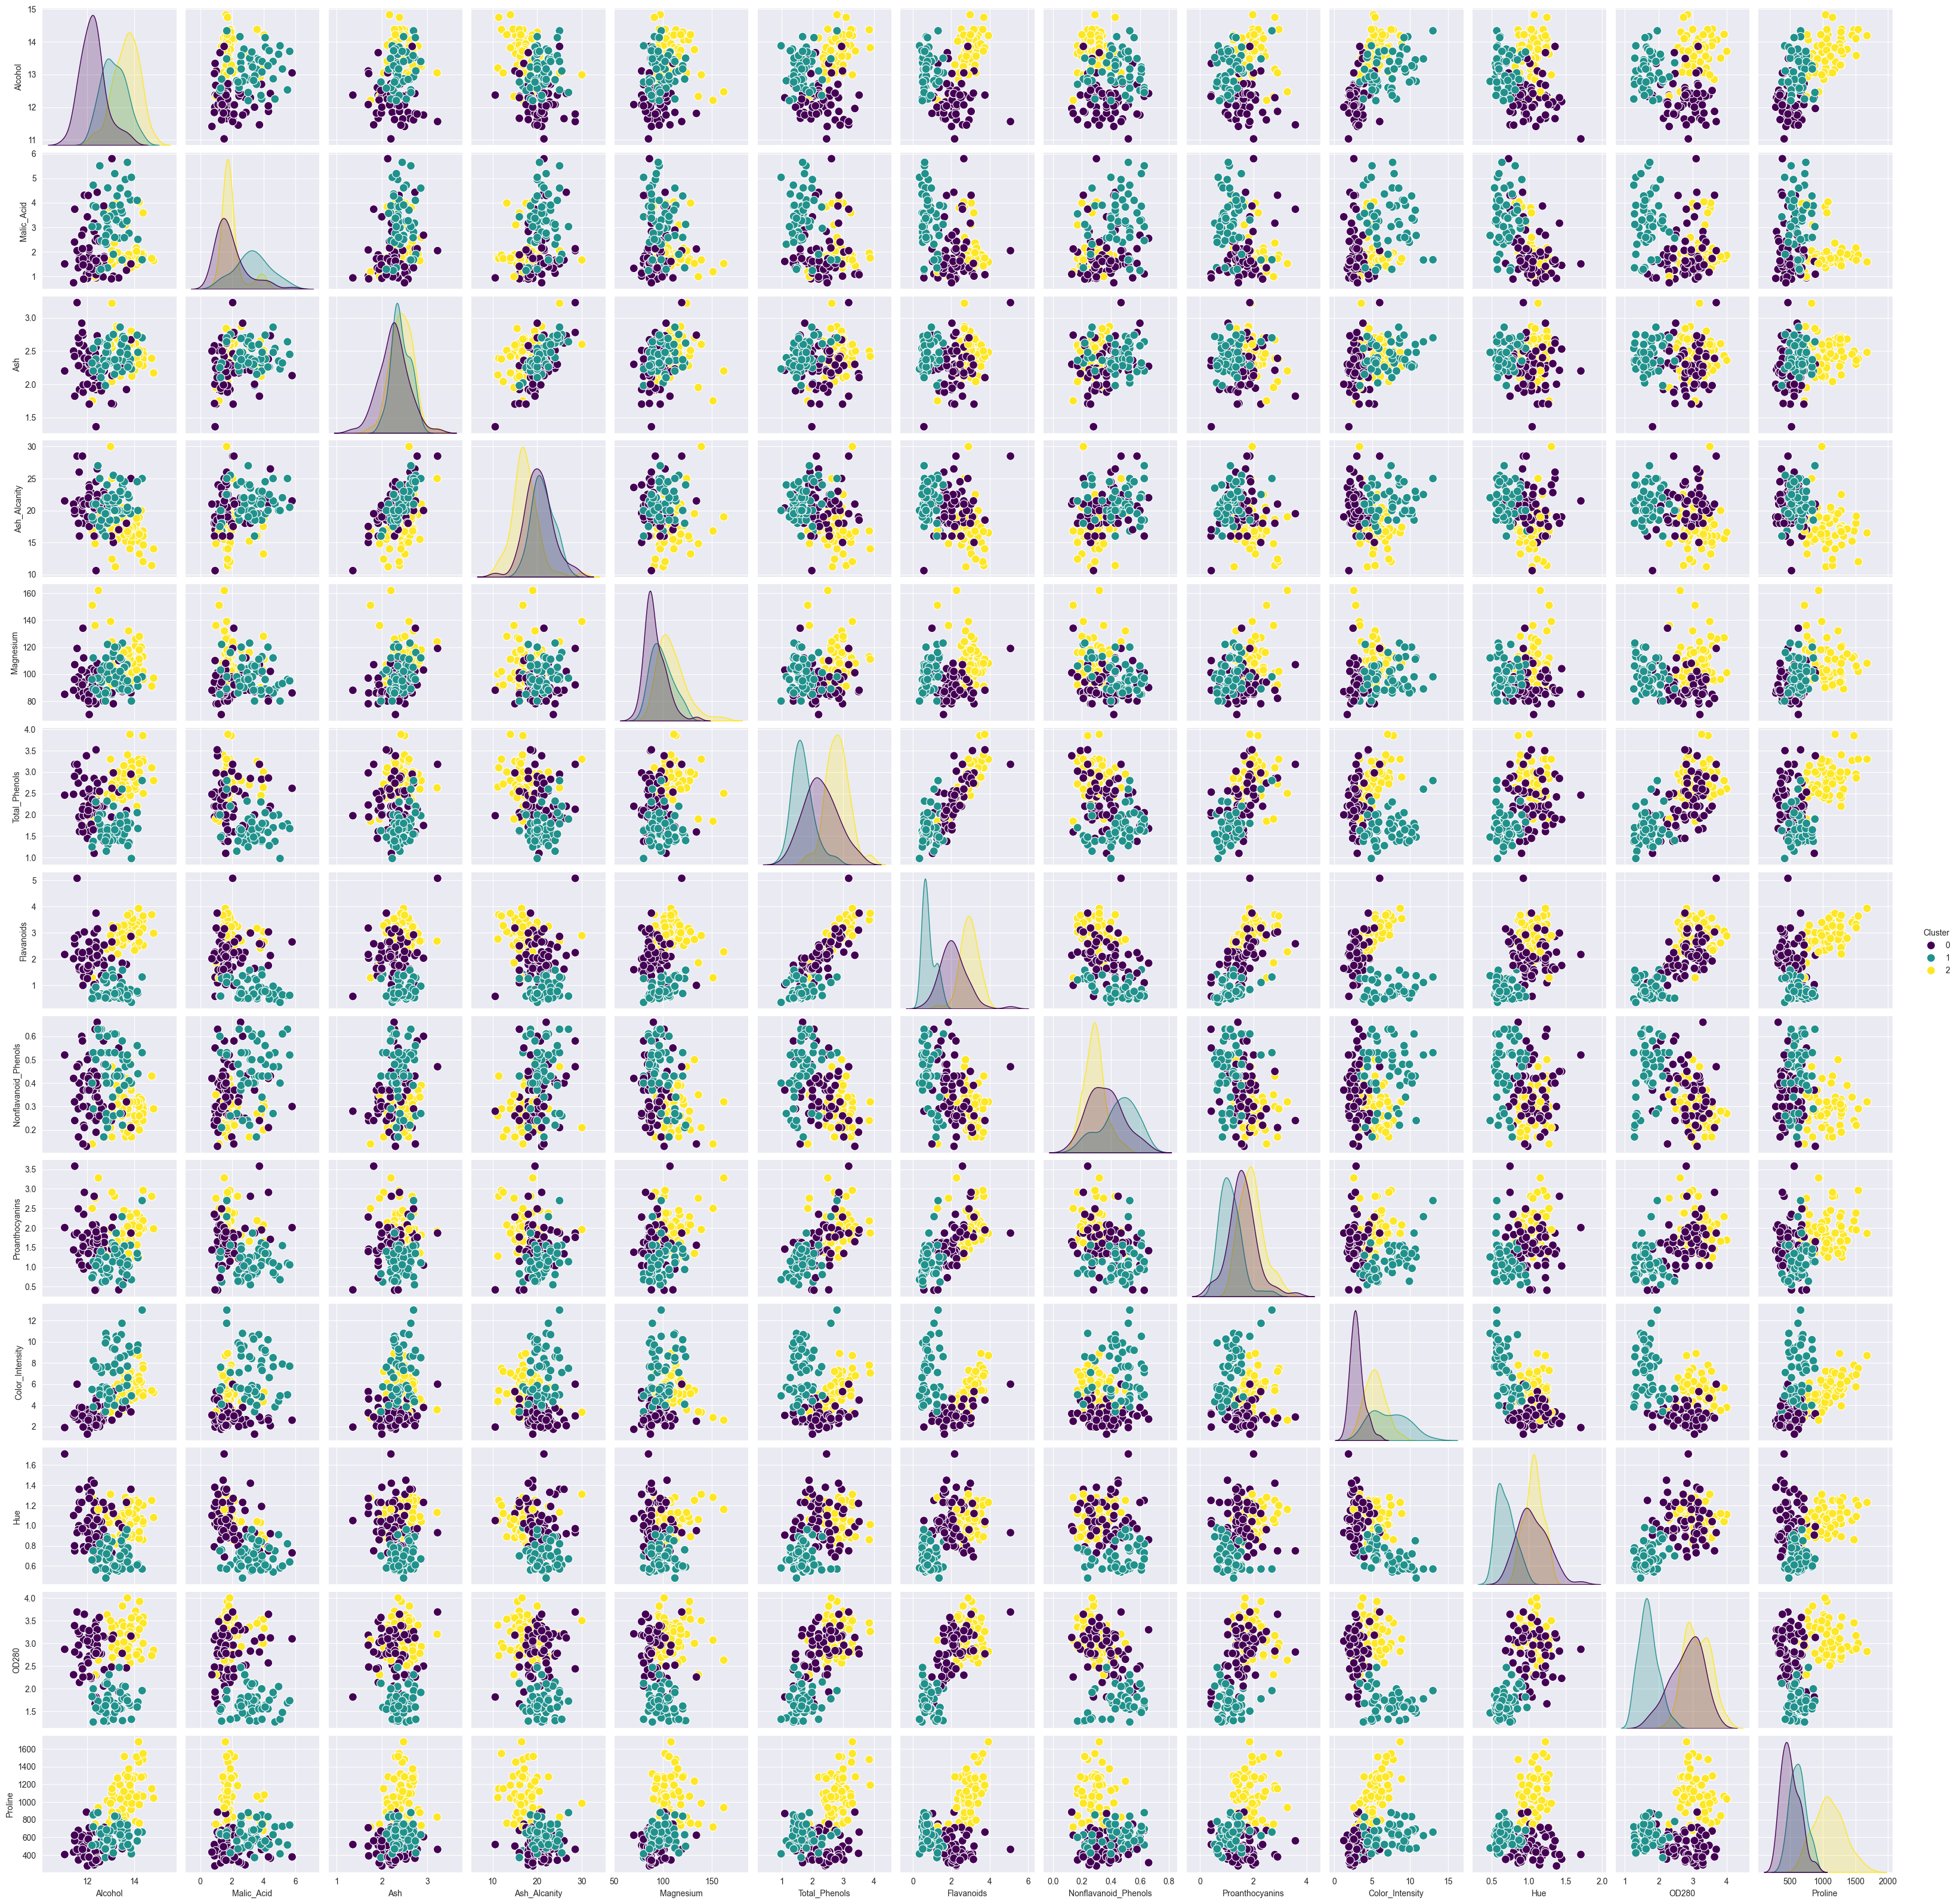

In [10]:
sns.pairplot(df, hue='Cluster', palette='viridis', diag_kind='kde', plot_kws={'s': 100})
plt.show()

## What is Dimensionality Reduction?

**Dimensionality Reduction** is a method used in machine learning and data analysis to reduce the number of features (dimensions) in a dataset while preserving important information. It helps simplify data, speed up processing, visualize complex datasets, and avoid issues like overfitting.

## What is PCA (Principal Component Analysis)?

**Principal Component Analysis (PCA)** is a popular dimensionality reduction technique. It transforms the original variables into a new set of variables called principal components, which are uncorrelated and capture the maximum possible variance in the data.

## How PCA Works:

1. **Standardize the Data**  
   Ensure each feature has zero mean and unit variance.

2. **Calculate the Covariance Matrix**  
   Measures how features vary together.

3. **Compute Eigenvalues and Eigenvectors**  
   Identify directions (eigenvectors) and importance (eigenvalues) of variation in data.

4. **Select Principal Components**  
   Choose the top principal components based on the largest eigenvalues.

5. **Transform Data**  
   Project original data onto the selected principal components to get reduced dimensions.

PCA simplifies data by focusing only on directions where data varies the most, reducing noise and redundancy.

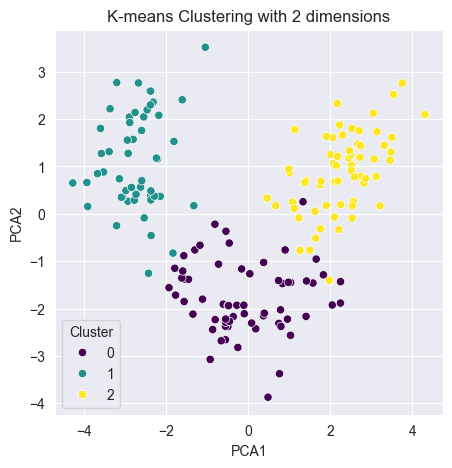

In [11]:
from sklearn.decomposition import PCA
pca_wine = PCA(n_components=2)
pca_wine_result = pca_wine.fit_transform(df_scaled[features])

df['PCA1'] = pca_wine_result[:, 0]
df['PCA2'] = pca_wine_result[:, 1]

plt.figure(figsize=(5, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=df)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

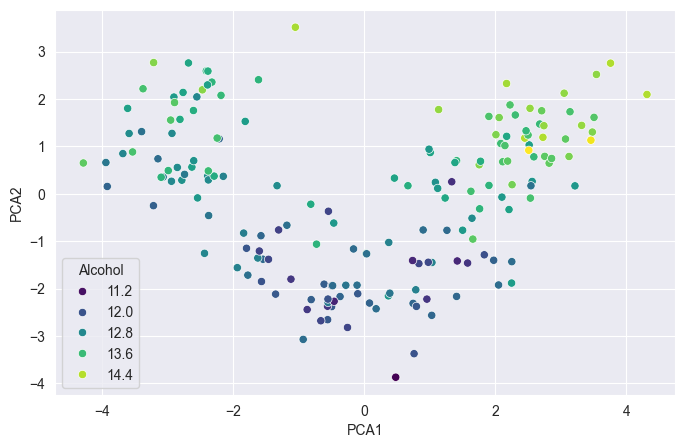

In [13]:
# plot color bar for Alcohol
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='Alcohol', palette='viridis', data=df)
plt.show()

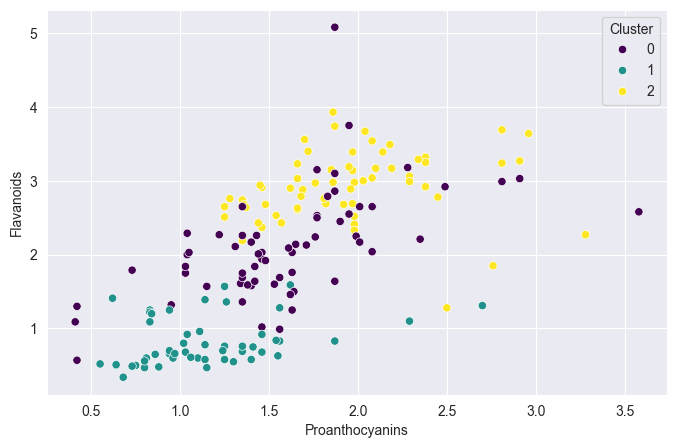

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data = df, x='Proanthocyanins', y='Flavanoids',hue = 'Cluster', palette='viridis')
plt.show()

In [15]:
hc = AgglomerativeClustering(n_clusters=3, metric='cosine', linkage='complete')
hc.fit(df_scaled)

df['Cluster_HC'] = hc.labels_
df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Cluster      PCA1      PCA2  Cluster_HC  
0   3.92     1065        2  3.316751  1.443463           1  
1   3.40     1050        2  2.209465 -0.333393           1  
2   3.17     1185        2  2.516740  1.031151           1  
3   3.45     1480        2  3.757066  2.756372           1  
4   2.93      735        2  1.008908  0.869831           0

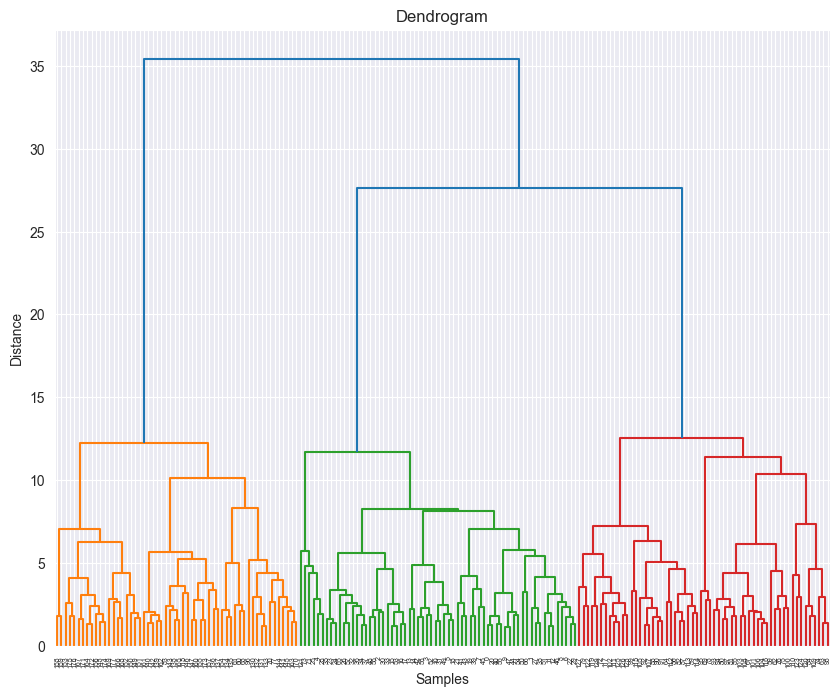

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_scaled[features])

# Perform hierarchical clustering using linkage
Z = linkage(scaled_data, method='ward')  # 'ward' minimizes the variance of merged clusters

# Plot the dendrogram
plt.figure(figsize=(10, 8))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

Download and Practice with [Clustering Exercises Datasets](https://www.kaggle.com/datasets/joonasyoon/clustering-exercises)

![Clustering](ce.png)

Example Notebook on Kaggle: [https://www.kaggle.com/code/marcinrutecki/clustering-methods-comprehensive-study](https://www.kaggle.com/code/marcinrutecki/clustering-methods-comprehensive-study)

In [17]:
df_students = pd.read_csv('../Datasets/student_performance_clean.csv')
df_students['Extracurricular Activities'] = df_students['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
scaler = StandardScaler()
df_students_scaled = df_students.copy()
df_students_scaled = scaler.fit_transform(df_students)
df_students_scaled = pd.DataFrame(df_students_scaled, columns=df_students.columns)
df_students_scaled.head()

Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0       0.817369         1.704363                    1.010191     1.493800   
1      -0.405875         0.724084                   -0.989911    -1.528624   
2       1.225116        -1.063483                    1.010191     0.284830   
3       0.001873        -1.005820                    1.010191    -0.924139   
4       0.817369         0.320440                   -0.989911     0.889315   

   Sample Question Papers Practiced  Performance Index  
0                         -1.250278           1.862730  
1                         -0.901397           0.509318  
2                         -0.901397          -0.531768  
3                         -0.901397          -1.000257  
4                          0.145248           0.561372

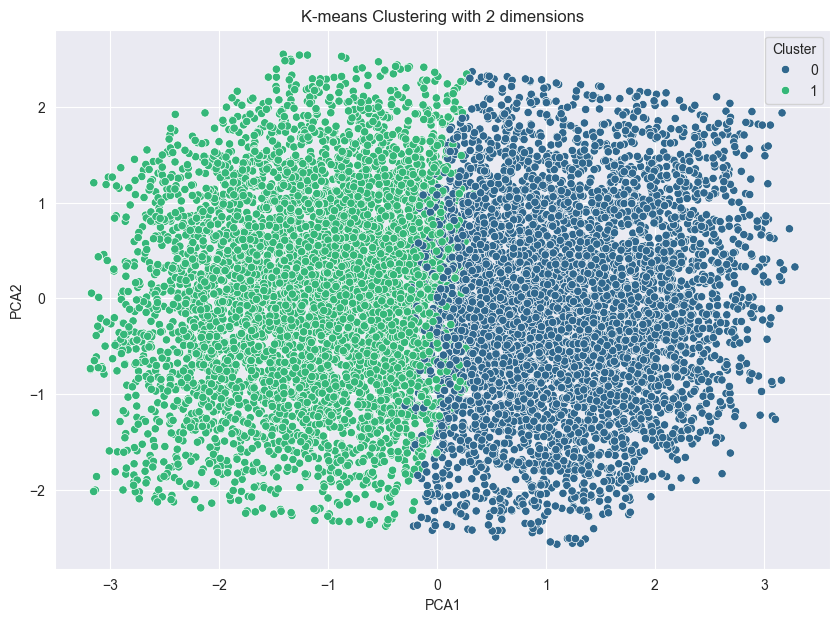

In [18]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_students_scaled)
df_students['PCA1'] = pca_result[:, 0]
df_students['PCA2'] = pca_result[:, 1]

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(df_students_scaled)
df_students['Cluster'] = clusters

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=df_students)
plt.title('K-means Clustering with 2 dimensions')
plt.show()


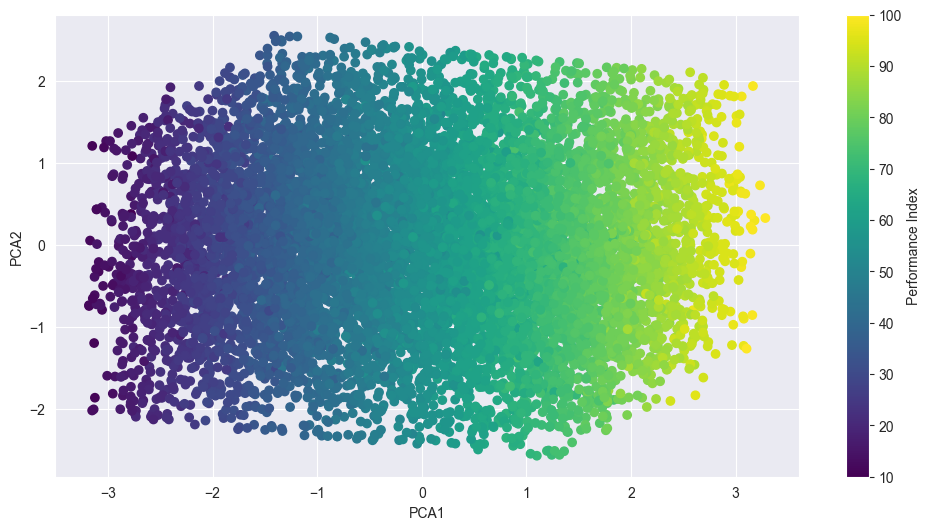

In [27]:
plt.figure(figsize=(12, 6))
scatter = plt.scatter(df_students['PCA1'], df_students['PCA2'], 
                     c=df_students['Performance Index'], cmap='viridis')
plt.colorbar(scatter, label='Performance Index')
plt.xlabel('PCA1')
plt.ylabel('PCA2') 
plt.show()